In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means
import glob, os, ntpath
from helpers import *
%load_ext autoreload
%autoreload 2

# Load data

In [2]:
imgs_names = glob.glob('**/*.tif')
imgs = [cv.imread(name, cv.IMREAD_UNCHANGED) for name in imgs_names]
imgs_names = [extract_name(name) for name in imgs_names] # leave only the file name so it's easy to add notation of augmentation

# Filter noise and detect holes

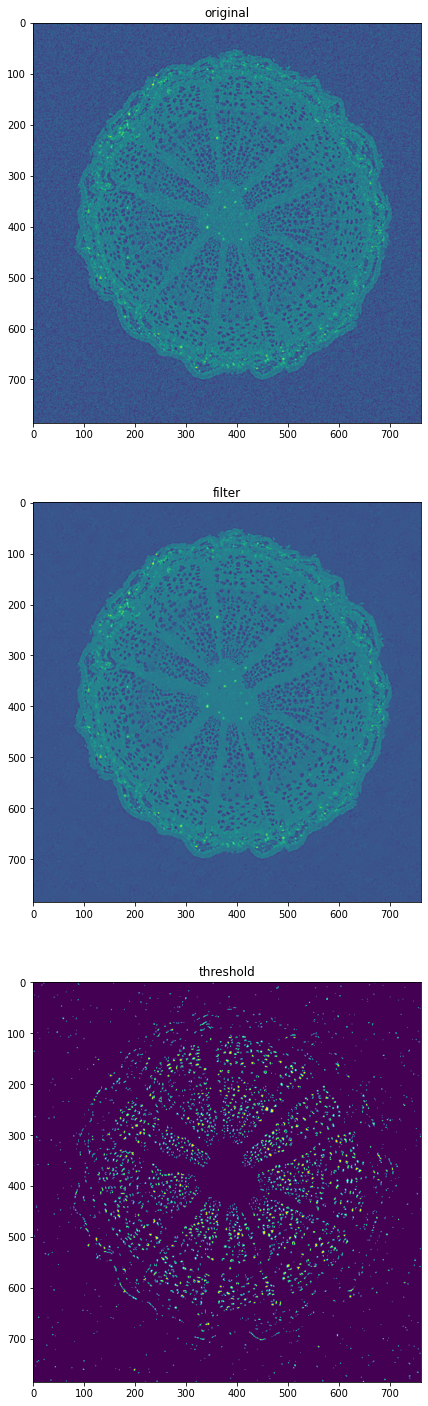

Threshold value =  18964


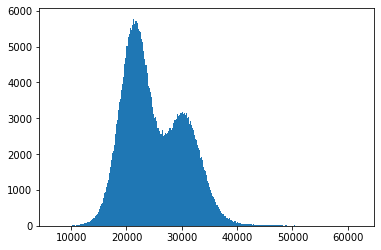

In [5]:
img = imgs[0].copy()
# img = img - np.min(img)
# img = img / np.max(img)
# img = np.uint8(img * 255)
sigma = find_best_sigma(img,125)
plt.figure(figsize=(25,25))
plt.subplot(311)
plt.imshow(img)
plt.title('original')
plt.subplot(312)
img_dn = denoise_nl_means(img, patch_size=7, patch_distance=11, h=0.6*sigma, fast_mode=False, sigma=sigma)
plt.imshow(img_dn)
plt.title('filter')
plt.subplot(313)
th = find_otsu(img_dn)
_,img_th = cv.threshold(img_dn,th,img_dn.max(),cv.THRESH_BINARY_INV)
plt.imshow(img_th)
plt.title('threshold')
plt.show()

print('Threshold value = ',th)

hist = plt.hist(img.ravel(),512,[img.min(),img.max()])
plt.show()

# Data augmentation

In [ ]:
# labels = []
n = len(imgs)

# add noisy versions
noiseLvls = [0.2,0.1,0.05]
for i in range(n):
    row,col = imgs[i].shape
    name = imgs_names[i]
    for j,noise in enumerate(noiseLvls):
        imgs.append(imgs[i]+np.random.normal(0.0,noise,(row,col))*65535)
        imgs_names.append(name+'_gn'+str(j))
        # labels.append(y)
    imgs.append(imgs[i]*(np.random.randn(row,col)*0.4+1))
    imgs_names.append(name+'_sn')
    # labels.append(y)

n = len(imgs)
rotations = [cv.ROTATE_90_CLOCKWISE, cv.ROTATE_180, cv.ROTATE_90_COUNTERCLOCKWISE]
# add rotated and flipped versions
for i in range(n):
    name = imgs_names[i]
    # y = labels[i]
    # add rotated versions
    imgs.append(cv.flip(imgs[i],1))
    imgs_names.append(name+'_fr000')
    # labels.append(cv.flip(y,1))
    for j,r in enumerate(rotations):
        angle = str((j+1)*90)
        imgs.append(cv.rotate(imgs[i],r))
        imgs_names.append(name+'_r'+angle)
        # labels.append(cv.rotate(y,r))
        imgs.append(cv.rotate(cv.flip(imgs[i],1),r))
        imgs_names.append(name+'_fr'+angle)
        # labels.append(cv.rotate(cv.flip(y,1),r))

In [ ]:
n = 25
a = np.ceil(np.sqrt(len(imgs[:n])))
plt.figure(figsize=(40,40))
for i in range(len(imgs[:n])):
    plt.subplot(a,a,i+1)
    plt.imshow(imgs[i])
    plt.title(imgs_names[i])
plt.show()